# Impact of Number and Type of Hobbies on Stress Levels

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('Responses.csv',encoding='latin1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   What is your age group?                                                           63 non-null     object
 1   Gender                                                                            63 non-null     object
 2   Type of Hobbies you engage in?(Select all that apply)                             63 non-null     object
 3   How often do you engage in your hobbies?                                          63 non-null     object
 4   On average, how many hours per week do you spend on your hobbies?                 63 non-null     object
 5   On a scale from 1 to 10, how would you rate your overall mental health?           63 non-null     int64 
 6   What is your

In [5]:
df.head()

,What is your age group?,Gender,Type of Hobbies you engage in?(Select all that apply),How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,What benefits do you gain from engaging in your hobbies? (Select all that apply),Do you mostly engage in your hobbies alone or with others?
0,1824,Female,"Creative, Social",Several times a week,1 to 3 hours,8,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups
1,1824,Male,"Intellectual, Others",Several times a week,4 to 7 hours,8,Moderate,Improves my mood,"Relaxation, Improved focus",Alone
2,1824,Male,"Physical, Intellectual, Social",Weekly,8+ hours,10,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally
3,1824,Male,"Creative, Physical, Intellectual",Daily,8+ hours,3,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups
4,1824,Female,Physical,Less frequently,Less than 1 hour,8,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally


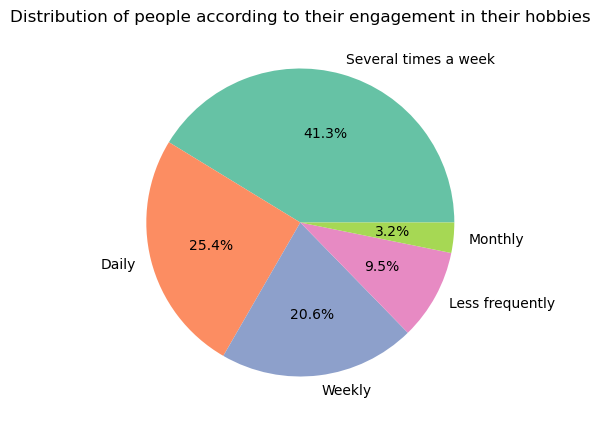

In [6]:
plt.figure(figsize = (5,5))
counts = df['How often do you engage in your hobbies?'].value_counts()
plt.pie(counts,labels = counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Distribution of people according to their engagement in their hobbies')
plt.show()

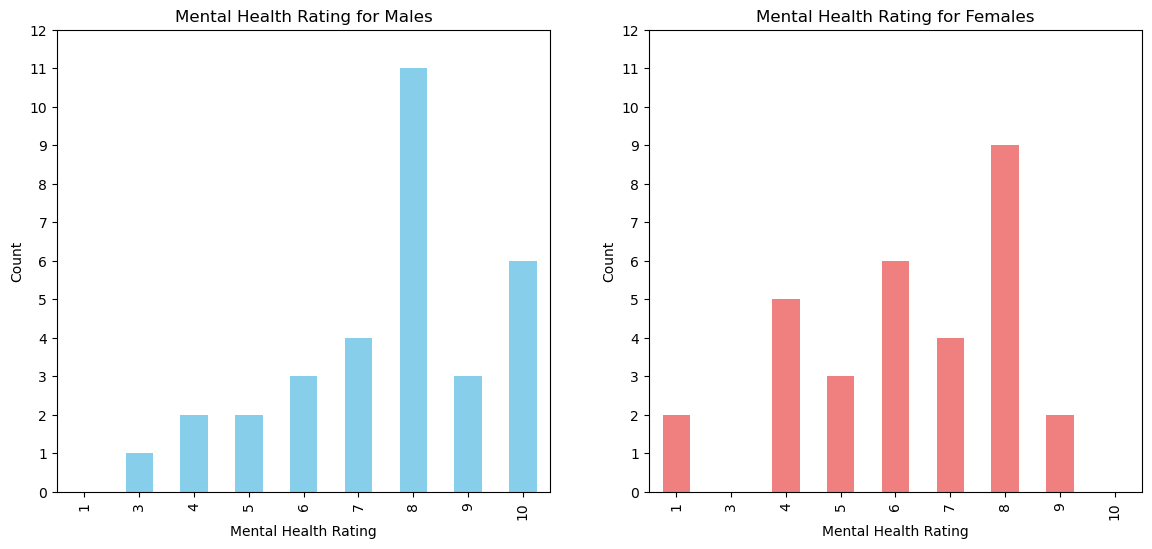

In [7]:
gender_mental_health = df.groupby(['Gender', 'On a scale from 1 to 10, how would you rate your overall mental health?']).size().unstack()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
gender_mental_health.loc['Male'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Mental Health Rating for Males')
axes[0].set_xlabel('Mental Health Rating')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(gender_mental_health.columns)
gender_mental_health.loc['Female'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Mental Health Rating for Females')
axes[1].set_xlabel('Mental Health Rating')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(gender_mental_health.columns)
y_max = gender_mental_health.max().max()
axes[0].set_yticks(np.arange(0, y_max + 2, step=1))
axes[1].set_yticks(np.arange(0, y_max + 2, step=1))
plt.show()

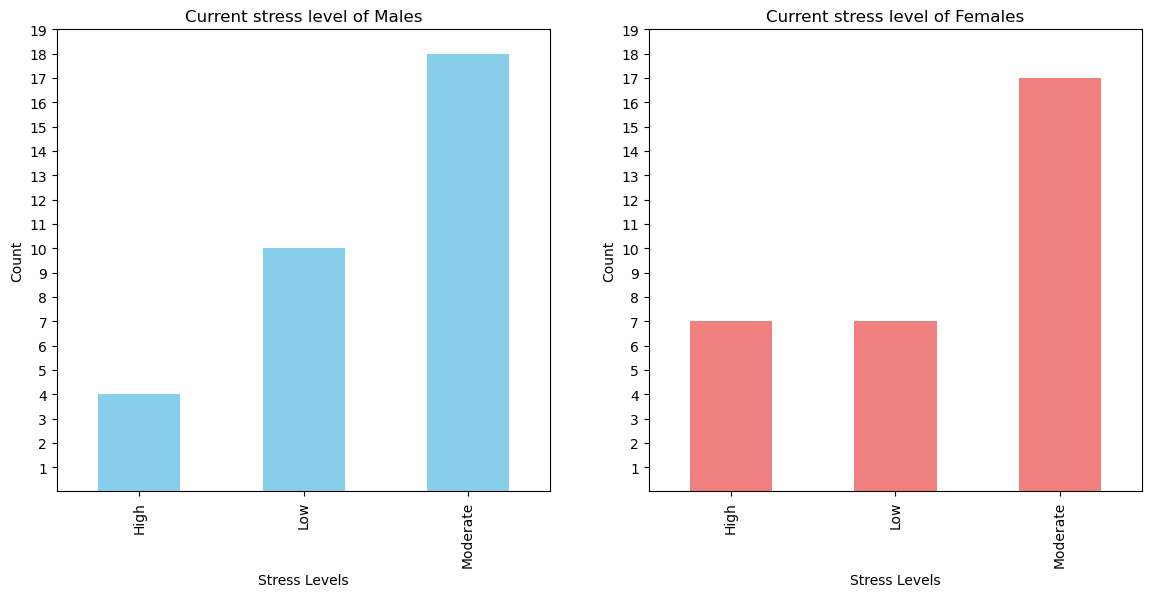

In [8]:
gender_mental_health = df.groupby(['Gender', 'What is your current stress level?']).size().unstack()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
bars_male = gender_mental_health.loc['Male'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Current stress level of Males')
axes[0].set_xlabel('Stress Levels')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(gender_mental_health.columns)
axes[0].set_yticks(list(range(1,20,1)))
bars_female = gender_mental_health.loc['Female'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Current stress level of Females')
axes[1].set_xlabel('Stress Levels')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(gender_mental_health.columns)
axes[1].set_yticks(list(range(1,20,1)))
plt.show()

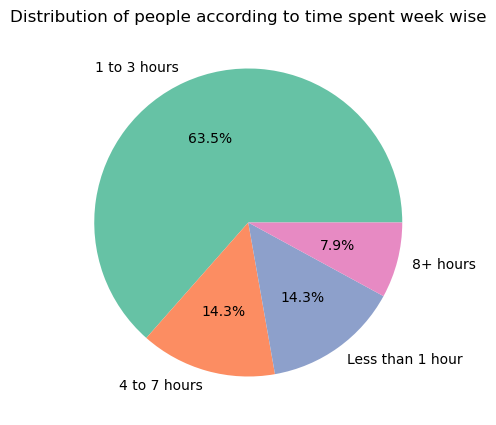

In [9]:
plt.figure(figsize = (5,5))
counts = df['On average, how many hours per week do you spend on your hobbies?'].value_counts()
plt.pie(counts,labels = counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Distribution of people according to time spent week wise')
plt.show()

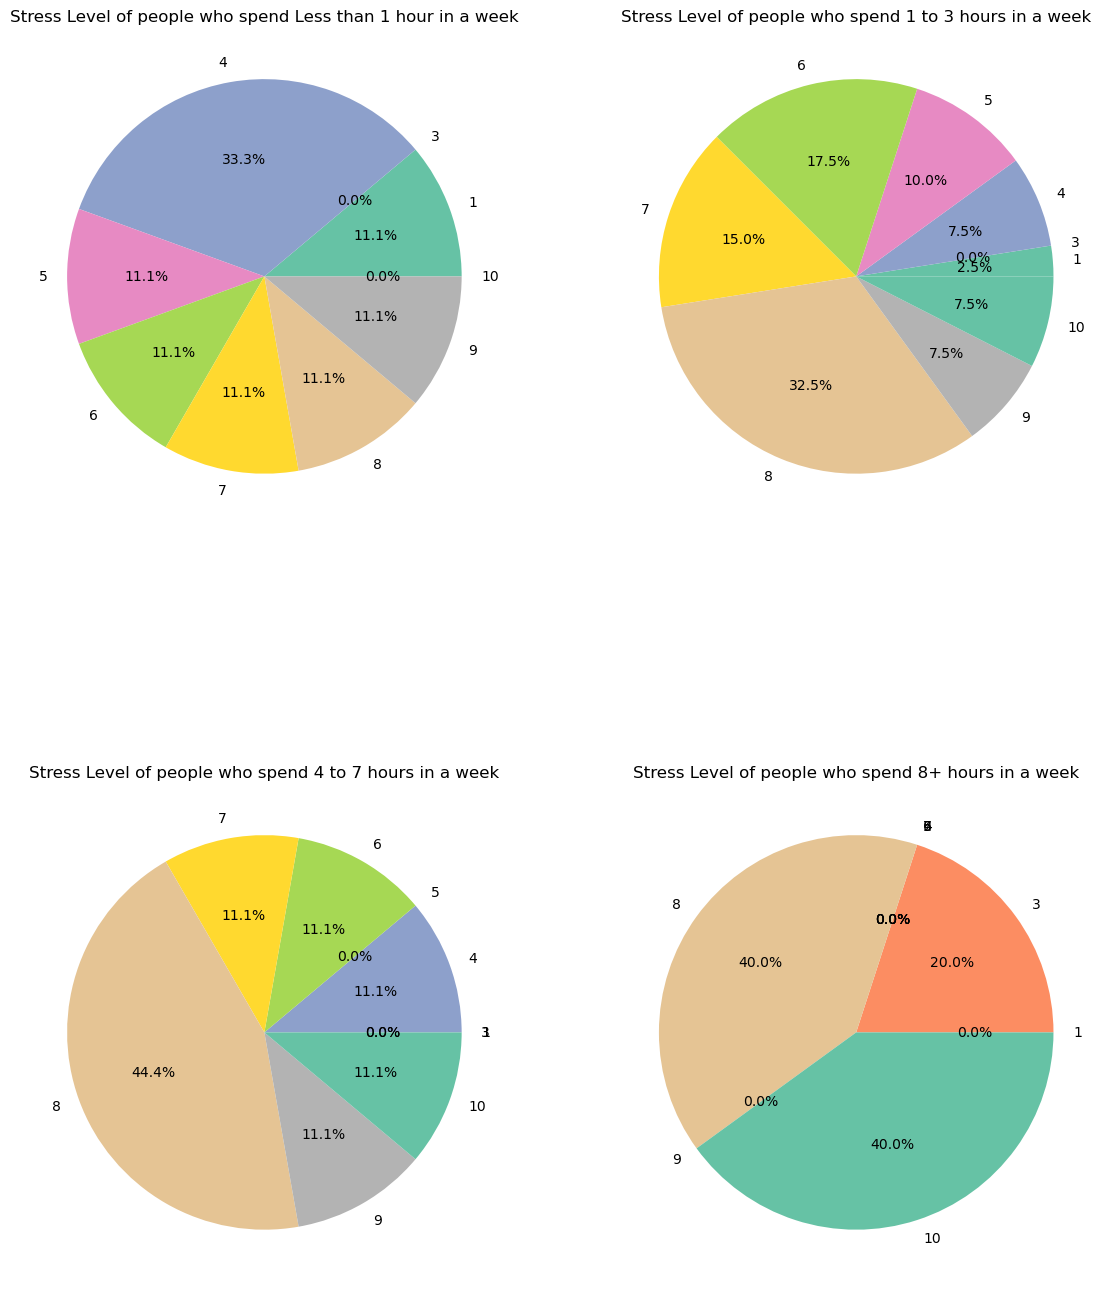

In [10]:
mental_health_number_of_hobbies = df.groupby(['On average, how many hours per week do you spend on your hobbies?' 
                                              , 'On a scale from 1 to 10, how would you rate your overall mental health?']).size().unstack().fillna(0)
n = 0
fig, axes = plt.subplots(2, 2, figsize=(14, 18))
categories = ['Less than 1 hour' , '1 to 3 hours' , '4 to 7 hours' , '8+ hours']
for i in categories:
    pies = mental_health_number_of_hobbies.loc[i]
    axes[n//2 , n%2].pie(pies, labels = pies.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
    axes[n//2 , n%2].set_title(f'Stress Level of people who spend {i} in a week')
    n= n+1
plt.show()

In [11]:
df['Number of hobbies'] = df['Type of Hobbies you engage in?(Select all that apply)'].apply(lambda x: len(x.split(',')))

In [12]:
df.head()

,What is your age group?,Gender,Type of Hobbies you engage in?(Select all that apply),How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,What benefits do you gain from engaging in your hobbies? (Select all that apply),Do you mostly engage in your hobbies alone or with others?,Number of hobbies
0,1824,Female,"Creative, Social",Several times a week,1 to 3 hours,8,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,2
1,1824,Male,"Intellectual, Others",Several times a week,4 to 7 hours,8,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,2
2,1824,Male,"Physical, Intellectual, Social",Weekly,8+ hours,10,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,3
3,1824,Male,"Creative, Physical, Intellectual",Daily,8+ hours,3,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3
4,1824,Female,Physical,Less frequently,Less than 1 hour,8,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,1


In [13]:
num = df['Number of hobbies'].unique()
print(num)

[2 3 1 4]


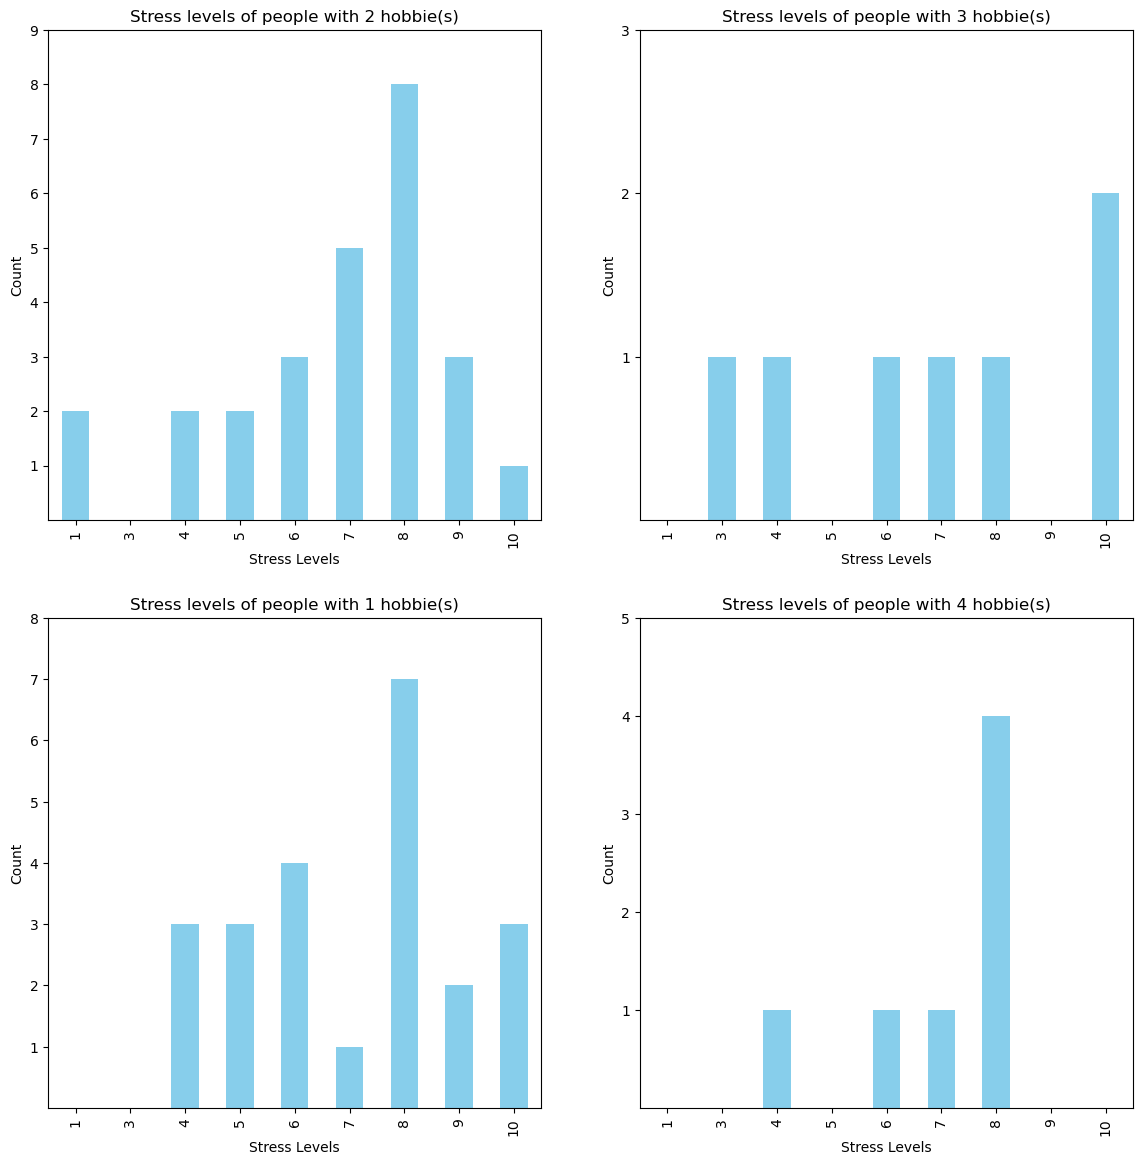

In [14]:
num = df['Number of hobbies'].unique()
mental_health_number_of_hobbies = df.groupby(['Number of hobbies' , 'On a scale from 1 to 10, how would you rate your overall mental health?']).size().unstack(fill_value = 0)
n = 0
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
for i in num:
    bars = mental_health_number_of_hobbies.loc[i]
    bars.plot(kind='bar', ax=axes[n//2 , n%2], color='skyblue')
    axes[n//2 , n%2].set_title(f'Stress levels of people with {i} hobbie(s)')
    axes[n//2 , n%2].set_xlabel('Stress Levels')
    axes[n//2 , n%2].set_ylabel('Count')
    available_ticks = bars.index.tolist()
    axes[n//2 , n%2].set_xticklabels(available_ticks)
    axes[n//2 , n%2].set_yticks(list(range(1,int(bars.max())+2,1)))
    n= n+1
plt.show()

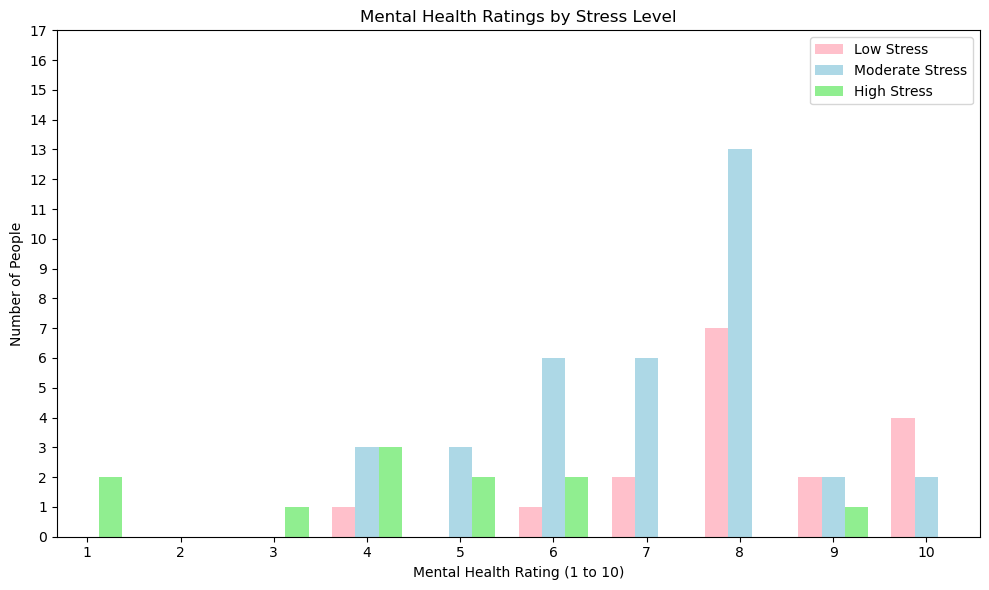

In [15]:
stress_level_rating = df.groupby(['What is your current stress level?' , 'On a scale from 1 to 10, how would you rate your overall mental health?']).size().unstack()
list1 = df['What is your current stress level?'].unique()
stress_level_rating = stress_level_rating.reindex(index=list1, columns=np.arange(1, 11), fill_value=0)
X_axis = np.arange(1,11)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(X_axis-0.25 ,stress_level_rating.loc['Low'],0.25, label = 'Low Stress',color = 'pink')
ax.bar(X_axis ,stress_level_rating.loc['Moderate'],0.25, label = 'Moderate Stress',color = 'lightblue')
ax.bar(X_axis+0.25 ,stress_level_rating.loc['High'],0.25, label = 'High Stress',color = 'lightgreen')
ax.set_xticks(X_axis)
y_max = stress_level_rating.max().max()
ax.set_yticks(np.arange(0, y_max + 5, step=1))
ax.set_xticklabels(X_axis)
ax.set_xlabel('Mental Health Rating (1 to 10)')
ax.set_ylabel('Number of People')
ax.set_title('Mental Health Ratings by Stress Level')
ax.legend()
plt.tight_layout()
plt.show()

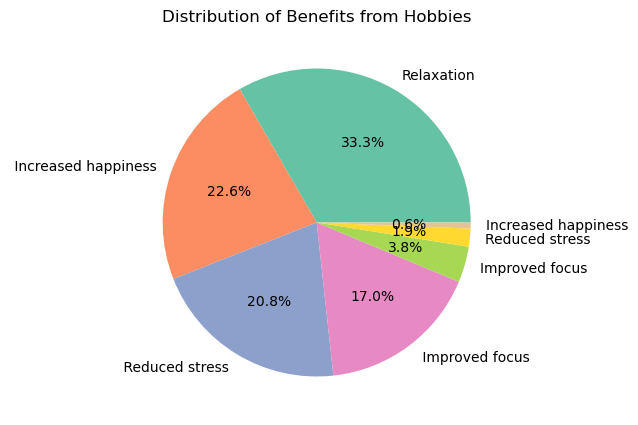

In [16]:
plt.figure(figsize = (5,5))
counts = df['What benefits do you gain from engaging in your hobbies? (Select all that apply)'].str.split(',').explode()
value_counts = counts.value_counts()
plt.pie(value_counts,labels = value_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Distribution of Benefits from Hobbies')
plt.show()

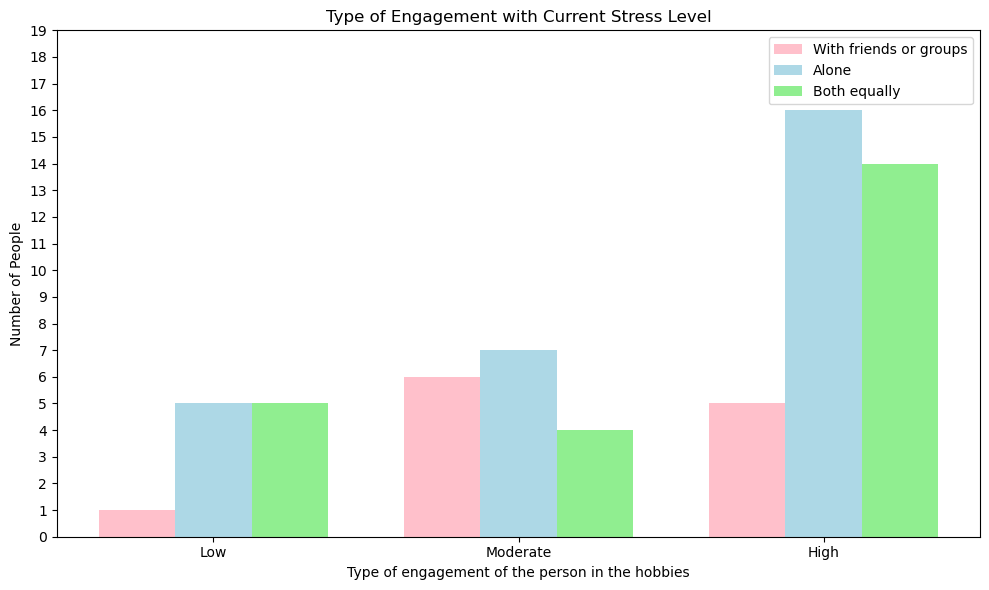

In [17]:
type_of_engage_in_hobbies = df.groupby(['Do you mostly engage in your hobbies alone or with others?' , 'What is your current stress level?']).size().unstack()
type_of_engage_in_hobbies = type_of_engage_in_hobbies.reindex(index=['With friends or groups','Alone','Both equally'])
stress_levels = ['Low' , 'Moderate' , 'High']
X_axis = np.arange(len(stress_levels))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(X_axis-0.25 ,type_of_engage_in_hobbies.loc['With friends or groups'],0.25, label = 'With friends or groups',color = 'pink')
ax.bar(X_axis ,type_of_engage_in_hobbies.loc['Alone'],0.25, label = 'Alone',color = 'lightblue')
ax.bar(X_axis+0.25 ,type_of_engage_in_hobbies.loc['Both equally'],0.25, label = 'Both equally',color = 'lightgreen')
ax.set_xticks(X_axis)
ax.set_yticks(np.arange(0,20))
ax.set_xticklabels(stress_levels)
ax.set_xlabel('Type of engagement of the person in the hobbies')
ax.set_ylabel('Number of People')
ax.set_title('Type of Engagement with Current Stress Level')
ax.legend()
plt.tight_layout()
plt.show()

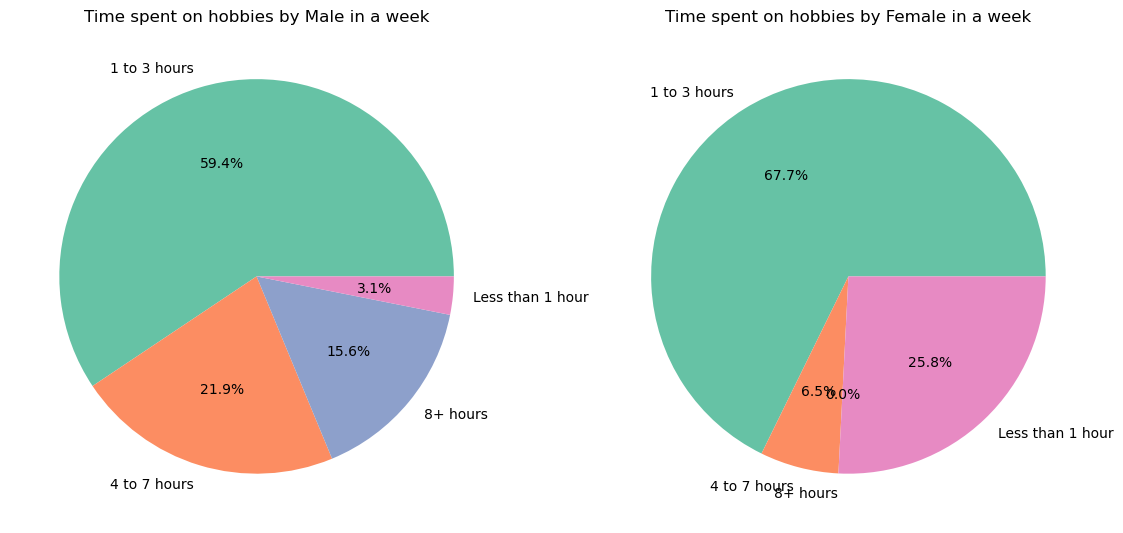

In [18]:
mental_health_number_of_hobbies = df.groupby(['Gender' ,'On average, how many hours per week do you spend on your hobbies?']).size().unstack().fillna(0)
n = 0
fig, axes = plt.subplots(1, 2, figsize=(14, 9))
categories = ['Male', 'Female']
for i in categories:
    pies = mental_health_number_of_hobbies.loc[i]
    axes[n].pie(pies, labels = pies.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
    axes[n].set_title(f'Time spent on hobbies by {i} in a week')
    n= n+1
plt.show()

In [19]:
df2 = df.copy()
df2.head()

,What is your age group?,Gender,Type of Hobbies you engage in?(Select all that apply),How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,What benefits do you gain from engaging in your hobbies? (Select all that apply),Do you mostly engage in your hobbies alone or with others?,Number of hobbies
0,1824,Female,"Creative, Social",Several times a week,1 to 3 hours,8,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,2
1,1824,Male,"Intellectual, Others",Several times a week,4 to 7 hours,8,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,2
2,1824,Male,"Physical, Intellectual, Social",Weekly,8+ hours,10,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,3
3,1824,Male,"Creative, Physical, Intellectual",Daily,8+ hours,3,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3
4,1824,Female,Physical,Less frequently,Less than 1 hour,8,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,1


In [20]:
age_group_mapping = {
    '1417' : 0,
    '1824' : 1,
    '2534' : 2,
    '3544' : 3,
    '4554' : 4
}
df2['What is your age group?'] = df2['What is your age group?'].map(age_group_mapping)
df2.head()

,What is your age group?,Gender,Type of Hobbies you engage in?(Select all that apply),How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,What benefits do you gain from engaging in your hobbies? (Select all that apply),Do you mostly engage in your hobbies alone or with others?,Number of hobbies
0,1.0,Female,"Creative, Social",Several times a week,1 to 3 hours,8,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,2
1,1.0,Male,"Intellectual, Others",Several times a week,4 to 7 hours,8,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,2
2,1.0,Male,"Physical, Intellectual, Social",Weekly,8+ hours,10,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,3
3,1.0,Male,"Creative, Physical, Intellectual",Daily,8+ hours,3,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3
4,1.0,Female,Physical,Less frequently,Less than 1 hour,8,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,1


In [21]:
gender_mapping = {
    'Female' : 0,
    'Male' : 1
}
df2['Gender'] = df2['Gender'].map(gender_mapping)
df2.head()

,What is your age group?,Gender,Type of Hobbies you engage in?(Select all that apply),How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,What benefits do you gain from engaging in your hobbies? (Select all that apply),Do you mostly engage in your hobbies alone or with others?,Number of hobbies
0,1.0,0,"Creative, Social",Several times a week,1 to 3 hours,8,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,2
1,1.0,1,"Intellectual, Others",Several times a week,4 to 7 hours,8,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,2
2,1.0,1,"Physical, Intellectual, Social",Weekly,8+ hours,10,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,3
3,1.0,1,"Creative, Physical, Intellectual",Daily,8+ hours,3,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3
4,1.0,0,Physical,Less frequently,Less than 1 hour,8,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,1


In [22]:
hours_mapping ={
    'Less than 1 hour' : 0.5,
    '1 to 3 hours' : 2,
    '4 to 7 hours' : 5.5,
    '8+ hours' : 8
}
df2['On average, how many hours per week do you spend on your hobbies?'] = df2['On average, how many hours per week do you spend on your hobbies?'].map(hours_mapping)
df2.head()

,What is your age group?,Gender,Type of Hobbies you engage in?(Select all that apply),How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,What benefits do you gain from engaging in your hobbies? (Select all that apply),Do you mostly engage in your hobbies alone or with others?,Number of hobbies
0,1.0,0,"Creative, Social",Several times a week,2.0,8,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,2
1,1.0,1,"Intellectual, Others",Several times a week,5.5,8,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,2
2,1.0,1,"Physical, Intellectual, Social",Weekly,8.0,10,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,3
3,1.0,1,"Creative, Physical, Intellectual",Daily,8.0,3,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3
4,1.0,0,Physical,Less frequently,0.5,8,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,1


In [23]:
df2 = df2.drop(columns = 'Type of Hobbies you engage in?(Select all that apply)')
df2.head()

,What is your age group?,Gender,How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,What benefits do you gain from engaging in your hobbies? (Select all that apply),Do you mostly engage in your hobbies alone or with others?,Number of hobbies
0,1.0,0,Several times a week,2.0,8,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,2
1,1.0,1,Several times a week,5.5,8,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,2
2,1.0,1,Weekly,8.0,10,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,3
3,1.0,1,Daily,8.0,3,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3
4,1.0,0,Less frequently,0.5,8,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,1


In [24]:
often_mapping = {
    'Less frequently' : 0,
    'Weekly' : 1,
    'Several times a week' : 2,
    'Daily' : 3
}
df2['How often do you engage in your hobbies?'] = df2['How often do you engage in your hobbies?'].map(often_mapping)
df2.head()

,What is your age group?,Gender,How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,What benefits do you gain from engaging in your hobbies? (Select all that apply),Do you mostly engage in your hobbies alone or with others?,Number of hobbies
0,1.0,0,2.0,2.0,8,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,2
1,1.0,1,2.0,5.5,8,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,2
2,1.0,1,1.0,8.0,10,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,3
3,1.0,1,3.0,8.0,3,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3
4,1.0,0,0.0,0.5,8,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,1


In [25]:
stress_level_mapping = {
    'Low' : 0,
    'Moderate' : 1,
    'High' : 2
}
df2['What is your current stress level?'] = df2['What is your current stress level?'].map(stress_level_mapping)
df2.head()

,What is your age group?,Gender,How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,What benefits do you gain from engaging in your hobbies? (Select all that apply),Do you mostly engage in your hobbies alone or with others?,Number of hobbies
0,1.0,0,2.0,2.0,8,0,Improves my mood,"Relaxation, Improved focus",With friends or groups,2
1,1.0,1,2.0,5.5,8,1,Improves my mood,"Relaxation, Improved focus",Alone,2
2,1.0,1,1.0,8.0,10,1,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,3
3,1.0,1,3.0,8.0,3,2,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3
4,1.0,0,0.0,0.5,8,1,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,1


In [26]:
effect_mapping = {
    'Improves my mood' : 2,
    'No noticeable change' : 1,
    'Worsens my mood' : 0
}
df2['How does engaging in your hobbies typically affect your mood?'] = df2['How does engaging in your hobbies typically affect your mood?'].map(effect_mapping)
df2.head()

,What is your age group?,Gender,How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,What benefits do you gain from engaging in your hobbies? (Select all that apply),Do you mostly engage in your hobbies alone or with others?,Number of hobbies
0,1.0,0,2.0,2.0,8,0,2,"Relaxation, Improved focus",With friends or groups,2
1,1.0,1,2.0,5.5,8,1,2,"Relaxation, Improved focus",Alone,2
2,1.0,1,1.0,8.0,10,1,2,"Relaxation, Improved focus, Reduced stress",Both equally,3
3,1.0,1,3.0,8.0,3,2,2,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3
4,1.0,0,0.0,0.5,8,1,2,"Relaxation, Improved focus, Reduced stress, In...",Both equally,1


In [27]:
df2['Number of benefitss'] = df2['What benefits do you gain from engaging in your hobbies? (Select all that apply)'].apply(lambda x: len(x.split(',')))
df2.head()

,What is your age group?,Gender,How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,What benefits do you gain from engaging in your hobbies? (Select all that apply),Do you mostly engage in your hobbies alone or with others?,Number of hobbies,Number of benefitss
0,1.0,0,2.0,2.0,8,0,2,"Relaxation, Improved focus",With friends or groups,2,2
1,1.0,1,2.0,5.5,8,1,2,"Relaxation, Improved focus",Alone,2,2
2,1.0,1,1.0,8.0,10,1,2,"Relaxation, Improved focus, Reduced stress",Both equally,3,3
3,1.0,1,3.0,8.0,3,2,2,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3,4
4,1.0,0,0.0,0.5,8,1,2,"Relaxation, Improved focus, Reduced stress, In...",Both equally,1,4


In [28]:
df2 = df2.drop(columns = 'What benefits do you gain from engaging in your hobbies? (Select all that apply)')
df2.head()

,What is your age group?,Gender,How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,Do you mostly engage in your hobbies alone or with others?,Number of hobbies,Number of benefitss
0,1.0,0,2.0,2.0,8,0,2,With friends or groups,2,2
1,1.0,1,2.0,5.5,8,1,2,Alone,2,2
2,1.0,1,1.0,8.0,10,1,2,Both equally,3,3
3,1.0,1,3.0,8.0,3,2,2,With friends or groups,3,4
4,1.0,0,0.0,0.5,8,1,2,Both equally,1,4


In [29]:
engage_context_mapping = {
    'Alone' : 0,
    'Both equally' : 1,
    'With friends or groups' : 2
}
df2['Do you mostly engage in your hobbies alone or with others?'] = df2['Do you mostly engage in your hobbies alone or with others?'].map(engage_context_mapping)
df2.head()

,What is your age group?,Gender,How often do you engage in your hobbies?,"On average, how many hours per week do you spend on your hobbies?","On a scale from 1 to 10, how would you rate your overall mental health?",What is your current stress level?,How does engaging in your hobbies typically affect your mood?,Do you mostly engage in your hobbies alone or with others?,Number of hobbies,Number of benefitss
0,1.0,0,2.0,2.0,8,0,2,2,2,2
1,1.0,1,2.0,5.5,8,1,2,0,2,2
2,1.0,1,1.0,8.0,10,1,2,1,3,3
3,1.0,1,3.0,8.0,3,2,2,2,3,4
4,1.0,0,0.0,0.5,8,1,2,1,1,4


In [30]:
X = df2.drop(columns=['On a scale from 1 to 10, how would you rate your overall mental health?'])  # Features
y = df2['On a scale from 1 to 10, how would you rate your overall mental health?']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=42)

InvalidParameterError: The 'test_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 0 instead.

In [ ]:
# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

In [47]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.50      0.50      0.50         2
           8       1.00      0.50      0.67         2
           9       1.00      0.50      0.67         2

    accuracy                           0.43         7
   macro avg       0.42      0.25      0.31         7
weighted avg       0.71      0.43      0.52         7



C:\Users\Isha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Isha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Isha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Isha\anaconda3\Lib\site-packages\sklearn\m

In [171]:
# New data for prediction (example)
new_data = [[1.0, 1, 2.0, 5.0, 1, 2, 1, 2, 3]]  # A single row of data
# Predict using the trained model
predicted_value = model.predict(new_data)

print("Predicted Value:", predicted_value)

Predicted Value: [7]


C:\Users\Isha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
